In [62]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde,kstest
import matplotlib
matplotlib.style.use('plotting.mplstyle')

In [103]:
kappa_standard = az.from_netcdf("standard_cut.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_6p1 = az.from_netcdf("hopeless_cut_6.1.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_6p2 = az.from_netcdf("hopeless_cut_6.2.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_6p3 = az.from_netcdf("hopeless_cut_6.3.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_6p4 = az.from_netcdf("hopeless_cut_6.4.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_6p5 = az.from_netcdf("hopeless_cut_6.5.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_7 = az.from_netcdf("hopeless_cut_7.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_7p5 = az.from_netcdf("hopeless_cut_7.5.cdf").posterior.stack(draws=("chain", "draw"))['kappa']
kappa_8 = az.from_netcdf("hopeless_cut_8.cdf").posterior.stack(draws=("chain", "draw"))['kappa']

In [104]:
kde_standard = gaussian_kde(kappa_standard)
kde_6p1 = gaussian_kde(kappa_6p1)
kde_6p2 = gaussian_kde(kappa_6p2)
kde_6p3 = gaussian_kde(kappa_6p3)
kde_6p4 = gaussian_kde(kappa_6p4)
kde_6p5 = gaussian_kde(kappa_6p5)
kde_7 = gaussian_kde(kappa_7)
kde_7p5 = gaussian_kde(kappa_7p5)
kde_8 = gaussian_kde(kappa_8)

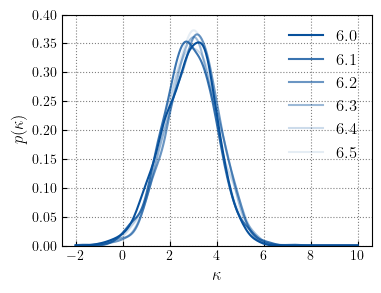

In [105]:
fig,ax = plt.subplots()

kappa_grid = np.linspace(-2,10,200)
ax.plot(kappa_grid,kde_standard(kappa_grid),label='6.0',color='#08519c',alpha=1.)
ax.plot(kappa_grid,kde_6p1(kappa_grid),label='6.1',color='#08519c',alpha=0.8)
ax.plot(kappa_grid,kde_6p2(kappa_grid),label='6.2',color='#08519c',alpha=0.6)
ax.plot(kappa_grid,kde_6p3(kappa_grid),label='6.3',color='#08519c',alpha=0.4)
ax.plot(kappa_grid,kde_6p4(kappa_grid),label='6.4',color='#08519c',alpha=0.2)
ax.plot(kappa_grid,kde_6p5(kappa_grid),label='6.5',color='#08519c',alpha=0.1)
#ax.plot(kappa_grid,kde_7(kappa_grid),label='7.0',color='#08519c',alpha=0.6)
#ax.plot(kappa_grid,kde_7p5(kappa_grid),label='7.5',color='#08519c',alpha=0.4)
#ax.plot(kappa_grid,kde_8(kappa_grid),label='8.0',color='#08519c',alpha=0.2)

ax.set_ylim(0,0.4)

ax.set_xlabel(r'$\kappa$')
ax.set_ylabel(r'$p(\kappa$)')

plt.legend()
plt.savefig('comparison_6.pdf',bbox_inches='tight')
plt.show()

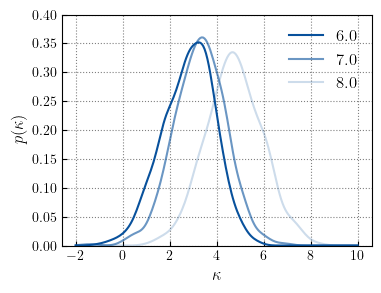

In [80]:
fig,ax = plt.subplots()

kappa_grid = np.linspace(-2,10,200)
ax.plot(kappa_grid,kde_standard(kappa_grid),label='6.0',color='#08519c',alpha=1.)
ax.plot(kappa_grid,kde_7(kappa_grid),label='7.0',color='#08519c',alpha=0.6)
ax.plot(kappa_grid,kde_8(kappa_grid),label='8.0',color='#08519c',alpha=0.2)

ax.set_ylim(0,0.4)
ax.set_xlabel(r'$\kappa$')
ax.set_ylabel(r'$p(\kappa$)')


plt.legend()

plt.savefig('comparison_678.pdf',bbox_inches='tight')
plt.show()

In [106]:
print(kstest(kappa_standard,kappa_6p1))
print(kstest(kappa_standard,kappa_6p2))
print(kstest(kappa_standard,kappa_6p3))
print(kstest(kappa_standard,kappa_6p4))
print(kstest(kappa_standard,kappa_6p5))

KstestResult(statistic=0.037, pvalue=0.5005673707894058)
KstestResult(statistic=0.075, pvalue=0.007195361443046065)
KstestResult(statistic=0.059, pvalue=0.06153429181321559)
KstestResult(statistic=0.04, pvalue=0.4006338815832625)
KstestResult(statistic=0.046, pvalue=0.24068202486600215)


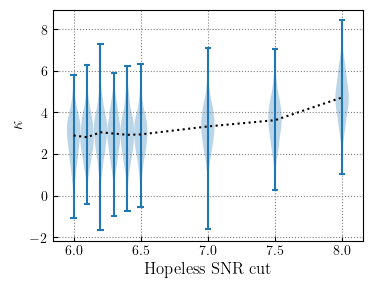

In [107]:
fig,ax = plt.subplots(figsize=(4,3))
ax.violinplot(
    np.array([kappa_standard,kappa_6p1,kappa_6p2,kappa_6p3,kappa_6p4,kappa_6p5,kappa_7,kappa_7p5,kappa_8]).T,
    positions=[6.,6.1,6.2,6.3,6.4,6.5,7,7.5,8],
    widths=0.1)

medians = np.median(np.array([kappa_standard,kappa_6p1,kappa_6p2,kappa_6p3,kappa_6p4,kappa_6p5,kappa_7,kappa_7p5,kappa_8]),axis=1)
ax.plot([6.,6.1,6.2,6.3,6.4,6.5,7,7.5,8],medians,color='black',ls=':')

ax.set_xlabel(r'Hopeless SNR cut')
ax.set_ylabel(r'$\kappa$')

plt.savefig('violin.pdf',bbox_inches='tight')